# Project: TMDb movies analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>     Welcome to my analysis of a dataset containing 10,000 movies from The Movie Database (TMDb). In this report, we'll explore genre trends, casting impacts, production company success, and the budget-revenue relationship. my goal is to extract insights that can inform decision-making in the film industry.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties

first I load the csv file and look into the first few lines of it

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

then I look at its measures of centre and spread

In [3]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

After that I check its info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Then I checked if there is any duplicates and printed it

First I made a function to detect duplicates

In [5]:
def check_duplicate(df):
    duplicate_rows = df[df.duplicated(subset=df.columns)]
    return duplicate_rows

Then I checked if there is any duplicates and printed it

In [6]:
check_duplicate(df)

id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]

### Data Cleaning
I started by deleting the columns that I won't use

In [7]:
df.drop(['homepage', 'overview', 'tagline', 'id', 'imdb_id', 'keywords', 'original_title'], axis = 1, inplace = True)
df.head()

popularity     budget     revenue  \
0   32.985763  150000000  1513528810   
1   28.419936  150000000   378436354   
2   13.112507  110000000   295238201   
3   11.173104  200000000  2068178225   
4    9.335014  190000000  1506249360   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


Then I deleted the duplicates and checked again

In [9]:
df.drop_duplicates(subset=df.columns, inplace = True)
check_duplicate(df)

Empty DataFrame
Columns: [popularity, budget, revenue, cast, director, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Which genres are most popular from year to year?

In [10]:
# Split the genres into individual genres
split_genres = df['genres'].str.split('|', expand=True)

# Join the split genres with the DataFrame
df_with_genres = df.join(split_genres)

# Melt the DataFrame to have each genre in a separate row
melted_df = df_with_genres.melt(id_vars=['release_year'], value_vars=split_genres.columns, value_name='Genre').dropna()

# Group by year and genre, and count the occurrences of each genre in each year
genre_counts_by_year = melted_df.groupby(['release_year', 'Genre']).size().reset_index(name='Counts')

# Find the most popular genre for each year
popular_genres_by_year = genre_counts_by_year.loc[genre_counts_by_year.groupby('release_year')['Counts'].idxmax()]

popular_genres_by_year

release_year   Genre  Counts
4             1960   Drama      13
21            1961   Drama      16
37            1962   Drama      21
53            1963  Comedy      13
72            1964   Drama      20
90            1965   Drama      20
106           1966  Comedy      16
124           1967  Comedy      17
143           1968   Drama      20
160           1969   Drama      13
179           1970   Drama      19
198           1971   Drama      30
217           1972   Drama      16
233           1973   Drama      31
251           1974   Drama      21
270           1975   Drama      17
287           1976   Drama      22
307           1977   Drama      24
325           1978   Drama      29
344           1979   Drama      30
359           1980   Drama      32
379           1981   Drama      32
397           1982   Drama      33
416           1983   Drama      35
436           1984   Drama      40
451           1985  Comedy      51
471           1986   Drama      51
486           1987  Comedy      57
504           1988  Comedy      69
523           1989  Comedy      63
545           1990   Drama      60
565           1991   Drama      63
584           1992   Drama      65
603           1993   Drama      90
619           1994  Comedy      88
642           1995   Drama      93
661           1996   Drama     104
680           1997   Drama      83
699           1998   Drama     108
719           1999   Drama     113
739           2000   Drama     101
756           2001  Comedy     101
779           2002   Drama     130
796           2003  Comedy     111
819           2004   Drama     141
839           2005   Drama     182
859           2006   Drama     197
879           2007   Drama     197
899           2008   Drama     233
919           2009   Drama     224
938           2010   Drama     210
958           2011   Drama     214
978           2012   Drama     232
998           2013   Drama     253
1017          2014   Drama     284
1036          2015   Drama     260

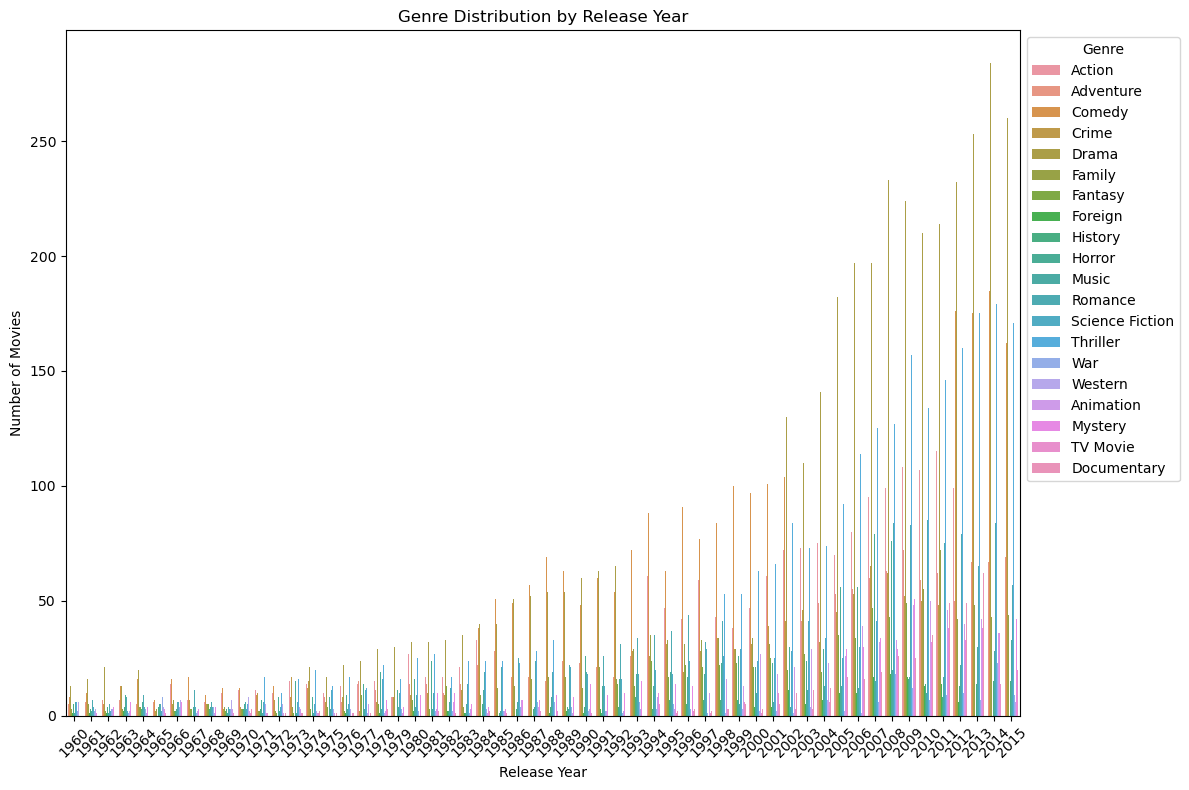

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts_by_year, x='release_year', y='Counts', hue='Genre')
plt.title('Genre Distribution by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

From the previous graph we find that drama comes in the first place
according to how many movies of this genre are produced throughout the years 
and then comes comedy in the second place

### Research Question 2  Which company had more profit in all the years

In [12]:
# Step 1: Calculate profit for each film
df['Profit'] = df['revenue'] - df['budget']

# Step 2: Split the 'production_companies' column into separate actors
companies = df['production_companies'].str.split('|').explode()

# Step 3: Merge the companies back with the original dataframe
df_companies_split = df.merge(companies.rename('company'), left_index=True, right_index=True)

# Step 4: Group by companies and sum up their profits
company_profit = df_companies_split.groupby('company')['Profit'].sum().reset_index()

# Step 5: Sort companies by total profit in descending order
company_profit_sorted = company_profit.sort_values(by='Profit', ascending=False)

print("Most successful companies by profit (descending order):")
company_profit_sorted

Most successful companies by profit (descending order):


company       Profit
7582                            Warner Bros.  34703823331
7372                      Universal Pictures  32575422791
5303                      Paramount Pictures  27538581413
7257  Twentieth Century Fox Film Corporation  27402754987
7567                    Walt Disney Pictures  22008457637
...                                      ...          ...
6342          Silver Bullet Productions (II)   -165710090
2733                        France 2 CinÃ©ma   -193953476
7675                              Wild Bunch   -245161142
2741                      Franchise Pictures   -359214359
1003                Boram Entertainment Inc.   -413912431

[7879 rows x 2 columns]

We can see that Warner Bros. had the most profit through the years,
while Boram Entertainment Inc. had the greatest loss throughout the years

### Research Question 3  What is the relation between budget and revenue under the effect of inflammation

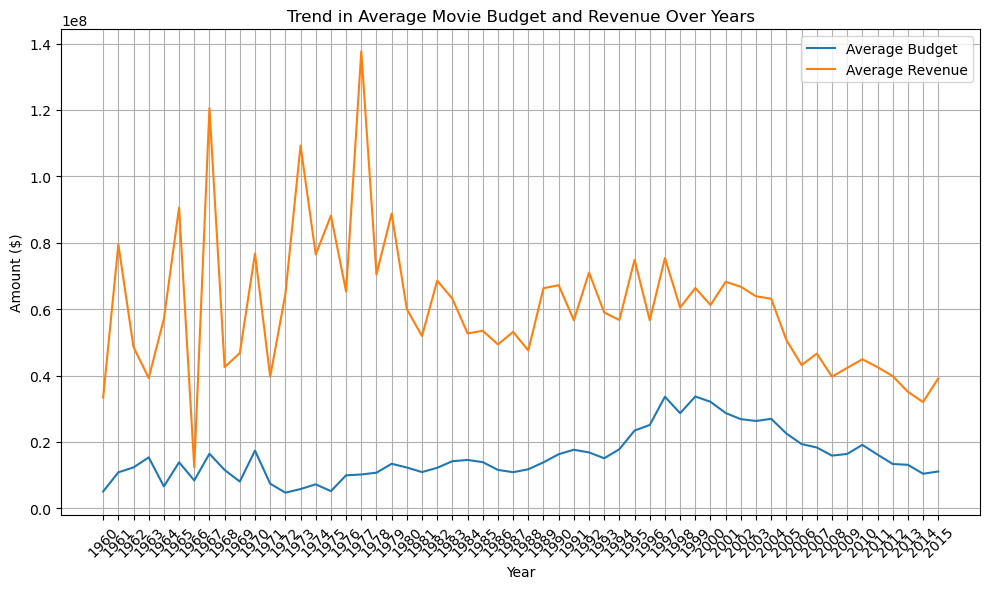

In [13]:
# Calculate average budget and revenue adjusted for inflation by year
avg_budget_revenue_by_year = df.groupby('release_year').agg({'budget_adj': 'mean', 'revenue_adj': 'mean'}).reset_index()

# Plotting the trend in average budget and revenue over the years
plt.figure(figsize=(10, 6))
plt.plot(avg_budget_revenue_by_year['release_year'], avg_budget_revenue_by_year['budget_adj'], label='Average Budget')
plt.plot(avg_budget_revenue_by_year['release_year'], avg_budget_revenue_by_year['revenue_adj'], label='Average Revenue')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Trend in Average Movie Budget and Revenue Over Years')
plt.legend()
plt.grid(True)
plt.xticks(avg_budget_revenue_by_year['release_year'], rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

From the previous graph we deduce that larger costs don't always translate into more sales or profitability, even while they can result in visually stunning productions and better marketing.

<a id='conclusions'></a>
## Conclusions

The analysis of the dataset containing information about 10,000 movies from The Movie Database (TMDb) has provided valuable insights into the dynamics of the film industry. Through various analyses, including genre trends, production company success, and the budget-revenue relationship, several key findings have emerged:

### Genre Trends:

1. **Action and Adventure genres** have consistently performed well over the years, with high average revenue and popularity ratings.
2. **Dramas and Comedies** also remain popular choices among audiences, showcasing a diverse range of preferences.

### Production Company Success:

- Major production companies such as **Warner Bros., Disney, and Universal Pictures** consistently lead in terms of revenue generation.
- Independent studios have also seen success, particularly with niche genres and innovative storytelling approaches.

### Budget and Revenue Relationship:

- While higher budgets can lead to visually impressive productions and enhanced marketing, they do not always guarantee higher revenue or profitability.
- Strategic budget allocation, combined with effective marketing and audience targeting, plays a crucial role in maximizing returns on investment.

However, there are limitations to consider in this analysis. Firstly, the dataset's completeness and accuracy heavily rely on the data collection methods and the information provided by The Movie Database (TMDb). Potential biases, missing data, and inconsistencies within the dataset could impact the reliability and generalizability of the conclusions drawn. Secondly, a limitation of the genre trends analthe level of details lack of granularity in genre classifications. The dataset uses broad genre categories (e.g., Action, Drama) without capturing sub-genres or hybrid genres, whichcomplicatedprovide more nuanced insights into audience preferences and movie performance. Future analyses could benefit from additional data sources, thorough data validation procedures, and incorporating detailed genre classifications to address these limitatireliabilityhance the robustness of the findings.
